In [3]:
import matplotlib
from matplotlib import font_manager, rc
import platform
import warnings   
warnings.filterwarnings(action='ignore')

In [4]:
### 한글
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
 font_name = font_manager.FontProperties(fname=path).get_name()
 rc('font', family=font_name)
elif platform.system()=="Darwin":
 rc('font', family='AppleGothic')
else:
 print("Unknown System")

### 정밀도 재현율 곡선을 이용하여 성능을 판단해 보기


In [5]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [6]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50),
 centers=2, cluster_std=[7.0, 2],
 random_state=22)

print(X.shape, y.shape)

(450, 2) (450,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
tree = DecisionTreeClassifier().fit(X_train, y_train) 


In [30]:
# SVC 모델
pred = svc.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1004
           1       0.64      0.67      0.66       121

    accuracy                           0.92      1125
   macro avg       0.80      0.81      0.81      1125
weighted avg       0.93      0.92      0.93      1125



In [31]:
# 의사결정 트리 모델
pred = tree.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1004
           1       0.62      0.59      0.60       121

    accuracy                           0.92      1125
   macro avg       0.78      0.77      0.78      1125
weighted avg       0.91      0.92      0.92      1125



### 정밀도-재현율 곡선 확인
* 새로운 모델을 만들 때, 운영을 위해 90% 재현율을 유지하는 것등의 필요조건을 지정할 때가 있다.
이를 운영 포인트를 지정한다고 말하고, 운영 포인트를 고정하면 비즈니스 목표 설정이나 고객내 다른
그룹의 성능을 보장하는데 도움이 된다.
* 이런 경우에 과제를 잘 이해하기 위해 모든 임계값을 조사하거나, 정밀도나 재현율의 모든 장단점을 살펴본
다.

In [34]:
from sklearn.metrics import precision_recall_curve

predict_prob = svc.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test,predict_prob)

In [36]:
print(thresholds)

[-1.42644669 -1.41801331 -1.41416031 ...  1.44315499  1.44543522
  1.4675732 ]


In [41]:
thresholds.min(), thresholds.max()

(-1.4264466917666971, 1.467573203281382)

In [25]:
precision.min(), precision.max()

(0.11019283746556474, 1.0)

In [13]:
recall.min(), recall.max()

(0.0, 1.0)

In [14]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다
X, y = make_blobs(n_samples=(4000, 500),
 centers=2,
 cluster_std=[7.0, 2],
 random_state=22)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


(4500, 2) (4500,)


In [17]:
svc = SVC(gamma=.05).fit(X_train, y_train)
pred = svc.decision_function(X_test) # 0의 값을 기준으로 분포
precision, recall, thresholds = precision_recall_curve(y_test, pred)

print(pred[0:10])


[-1.12256809  0.86782231 -0.14655591 -1.11330437 -1.11378355 -1.14388862
 -0.89066641 -0.99969575 -1.21851181 -1.25254411]


임계값 :  0 1
0


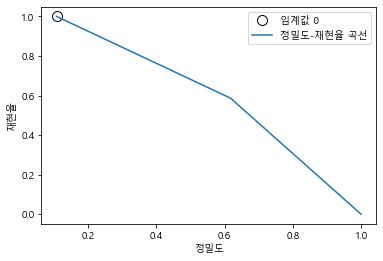

In [47]:
precision, recall, thresholds = precision_recall_curve(y_test, pred)
print("임계값 : ", thresholds.min(), thresholds.max())
# 0에 가까운 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds)) # thresholds의 절대값이 가장 작은 것(위치)
print(close_zero)
plt.plot(precision[close_zero],
 recall[close_zero], 'o',
 markersize=10,
 label="임계값 0",
 fillstyle="none", c='k')
plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

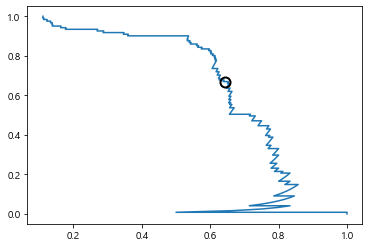

In [45]:
# SVC모델 그래프
plt.plot(precision, recall, label="svc")
# 기본 임계값(0) 위치 표시
plt.plot(precision[close_zero],
         recall[close_zero], 'o',
         markersize=10,
         label="svc: 임계값 0",
         fillstyle="none",
         c='k',
         mew=2)



# thresholds의 절대값이 가장 작은 것(위치) # thresholds에서 0의 위치가 어디냐 > 964



0


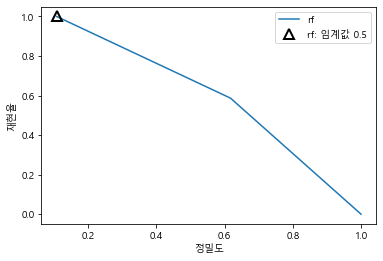

In [46]:

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공합니다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, pred)
# 랜덤포레스트 그래프
plt.plot(precision_rf, recall_rf, label="rf")
close_zero_rf = np.argmin(  np.abs(thresholds_rf - 0.5)  )   # 임계값이 0.5 위치
print(close_zero_rf)
# 기본 임계값(0.5) 위치 표시
plt.plot(precision_rf[close_zero_rf], recall_rf[close_zero_rf], '^', c='k',
         markersize=10, label="rf: 임계값 0.5", fillstyle="none", mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

In [18]:
# thresholds에서 0의 위치가 어디냐 > 964 확인 
thresholds[964]

0.004160997849588233

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
pred = rf.predict_proba(X_test)[:, 1]
pred

array([0.  , 0.35, 0.7 , ..., 0.  , 0.  , 0.  ])

47


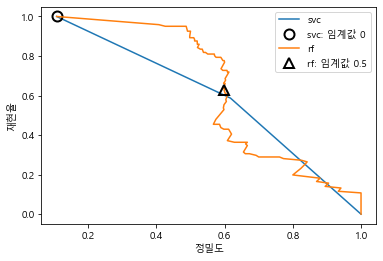

In [50]:
# SVC모델 그래프
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero],
 recall[close_zero], 'o',
 markersize=10,
 label="svc: 임계값 0",
 fillstyle="none",
 c='k',
 mew=2)


# RandomForestClassifier는 decision_function 대신 predict_proba를 제공합니다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, pred)



# 랜덤포레스트 그래프
plt.plot(precision_rf, recall_rf, label="rf")
close_zero_rf = np.argmin( np.abs(thresholds_rf - 0.5) ) # 임계값이 0.5 위치
print(close_zero_rf)
plt.plot(precision_rf[close_zero_rf], recall_rf[close_zero_rf], '^', c='k',
 markersize=10, label="rf: 임계값 0.5", fillstyle="none", mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")
